In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [5]:
trans = pd.read_csv('/content/drive/MyDrive/DA/Customer Segmentation Analysis/Transactions.csv')
cust = pd.read_csv('/content/drive/MyDrive/DA/Customer Segmentation Analysis/CustomerDemographic.csv')

In [6]:
trans.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


In [7]:
cust.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,64
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,37
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,63
3,4,Talbot,NaN,Male,33,1961-10-03,Missing,IT,Mass Customer,N,No,7.0,56
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,40


In [8]:
# join customer dataset and transaction dataset on customer_id
merged_trans_cust = pd.merge(trans, cust, left_on='customer_id', right_on='customer_id', how='inner')
merged_trans_cust.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,62
1,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,62
2,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,62
3,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,38
4,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,38


In [9]:
merged_trans_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19004 entries, 0 to 19003
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   product_id                           19004 non-null  int64  
 1   customer_id                          19004 non-null  int64  
 2   transaction_date                     19004 non-null  object 
 3   online_order                         19004 non-null  float64
 4   order_status                         19004 non-null  object 
 5   brand                                19004 non-null  object 
 6   product_line                         19004 non-null  object 
 7   product_class                        19004 non-null  object 
 8   product_size                         19004 non-null  object 
 9   list_price                           19004 non-null  float64
 10  standard_cost                        19004 non-null  float64
 11  product_first_sold_date     

In [10]:
merged_trans_cust['transaction_date'] = pd.to_datetime(merged_trans_cust['transaction_date'])

## RFM analysis

RFM Analysis là một phương pháp phân tích dữ liệu khách hàng được sử dụng rộng rãi trong lĩnh vực tiếp thị và quản lý khách hàng. RFM là viết tắt của Recency (Tần suất gần nhất), Frequency (Tần suất) và Monetary (Giá trị tiền tệ), ba chỉ số quan trọng để đánh giá và phân loại khách hàng. \

Recency (R): Tần suất gần nhất đo lường khoảng thời gian từ lần mua hàng gần nhất của khách hàng đến thời điểm hiện tại. Một khách hàng có recency thấp có nghĩa là họ đã mua hàng gần đây và có khả năng cao sẽ tiếp tục mua hàng trong tương lai. \
Frequency (F): Tần suất đo lường số lần mua hàng của mỗi khách hàng trong một khoảng thời gian nhất định. Khách hàng có tần suất cao thường là những khách hàng trung thành và có giá trị đối với doanh nghiệp. \
Monetary (M): Giá trị tiền tệ đo lường tổng giá trị của các giao dịch mà khách hàng đã thực hiện. Một khách hàng có giá trị tiền tệ cao thường là những khách hàng mua hàng với số lượng lớn hoặc mua các sản phẩm/dịch vụ có giá trị cao.

In [11]:
max_trans_date = max(merged_trans_cust['transaction_date']).date()
max_trans_date

datetime.date(2017, 12, 30)

In [12]:
comparison_date = datetime.strptime(str(max_trans_date), "%Y-%m-%d")

In [16]:
rfm_table = merged_trans_cust.groupby(['customer_id']).agg({'transaction_date': lambda date : (comparison_date - date.max()).days,
                                                            'product_id' : lambda prod_id : len(prod_id),
                                                            'Profit' : lambda p : sum(p)})
rfm_table.rename(columns={'transaction_date' : 'recency',
                        'product_id' : 'frequency',
                        'Profit' : 'monetary'} , inplace=True)
rfm_table.head()

,recency,frequency,monetary
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
3,102,7,3290.21
4,195,2,220.57
5,16,6,2394.94


In [17]:
# Dividing the recency, frequency and monetary into 4 quartiles (min, 25%, 50%, 75% and max).
rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'], 4, ['4','3','2','1'])
rfm_table['f_quartile'] = pd.qcut(rfm_table['frequency'], 4, ['1','2','3','4'])
rfm_table['m_quartile'] = pd.qcut(rfm_table['monetary'], 4, ['1','2','3','4'])

In [18]:
rfm_table['rfm_score'] = 100*rfm_table['r_quartile'].astype(int)+10*rfm_table['f_quartile'].astype(int)+rfm_table['m_quartile'].astype(int)

In [19]:
rfm_table['customer_catogories'] = pd.qcut(rfm_table['rfm_score'], 4, ['Bronze','Silver','Gold','Platinum'])

Merging both RFM Table with Transaction and Customer Tables

In [21]:
cust_trans_rfm = pd.merge(merged_trans_cust, rfm_table, left_on='customer_id', right_on='customer_id', how='inner')
cust_trans_rfm.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,...,tenure,Age,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_catogories
0,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,...,10.0,62,75,3,645.99,2,1,1,211,Silver
1,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,...,10.0,62,75,3,645.99,2,1,1,211,Silver
2,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,...,10.0,62,75,3,645.99,2,1,1,211,Silver
3,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,...,10.0,38,20,7,4179.11,3,3,4,334,Gold
4,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,...,10.0,38,20,7,4179.11,3,3,4,334,Gold


In [33]:
cust_trans_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19004 entries, 0 to 19003
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   product_id                           19004 non-null  int64         
 1   customer_id                          19004 non-null  int64         
 2   transaction_date                     19004 non-null  datetime64[ns]
 3   online_order                         19004 non-null  float64       
 4   order_status                         19004 non-null  object        
 5   brand                                19004 non-null  object        
 6   product_line                         19004 non-null  object        
 7   product_class                        19004 non-null  object        
 8   product_size                         19004 non-null  object        
 9   list_price                           19004 non-null  float64       
 10  standard_c

In [46]:
def cust_score_title(rfm_score):
    if rfm_score >= 444:
        return pd.Series(['Platinum Customer', 1])
    elif rfm_score >=433 and rfm_score < 444:
        return pd.Series(['Very Loyal', '2'])
    elif rfm_score >=421 and rfm_score < 433:
        return pd.Series(['Becoming Loyal', '3'])
    elif rfm_score >=344 and rfm_score < 421:
        return pd.Series(['Recent Customer', '4'])
    elif rfm_score >=323 and rfm_score < 344:
        return pd.Series(['Potential Customer', '5'])
    elif rfm_score >=311 and rfm_score < 323:
        return pd.Series(['Late Bloomer', '6'])
    elif rfm_score >=224 and rfm_score < 311:
        return pd.Series(['Loosing Customer', '7'])
    elif rfm_score >=212 and rfm_score < 224:
        return pd.Series(['High Risk Customer', '8'])
    elif rfm_score >=124 and rfm_score < 212:
        return pd.Series(['Almost Lost Customer', '9'])
    elif rfm_score >=112 and rfm_score < 124:
        return pd.Series(['Evasive Customer', '10'])
    else :
        return pd.Series(['Lost Customer', '11'])

cust_trans_rfm[['detail_cust_title','rank']]=cust_trans_rfm.apply(lambda x: cust_score_title(x.rfm_score), axis = 1)


In [103]:
cust_trans_rfm['rank'] = cust_trans_rfm['rank'].astype('int')

In [104]:
cust_trans_rfm['Age_Group'] = cust_trans_rfm['Age'].apply(lambda x : (math.floor(x/10)+1)*10)

In [105]:
cust_trans_rfm.to_csv('/content/drive/MyDrive/DA/Customer Segmentation Analysis/Customer_Trans_RFM_Analysis.csv', index=False)

## Data Analysis and Exploration

Compare Old Customer Age vs New Customer Age

In [52]:
new_cust = pd.read_csv('/content/drive/MyDrive/DA/Customer Segmentation Analysis/NewCustomerCleaned.csv')
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Group_Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,60,60
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,47,50
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,43,40
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,38,40
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,52,50


In [70]:
cust_trans_rfm.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,...,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_catogories,detail_cust_title,rank,Age_Group
0,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,...,3,645.99,2,1,1,211,Silver,Almost Lost Customer,9,70
1,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,...,3,645.99,2,1,1,211,Silver,Almost Lost Customer,9,70
2,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,...,3,645.99,2,1,1,211,Silver,Almost Lost Customer,9,70
3,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,...,7,4179.11,3,3,4,334,Gold,Potential Customer,5,40
4,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,...,7,4179.11,3,3,4,334,Gold,Potential Customer,5,40


## Age Distribution between Old Customer and New Customer

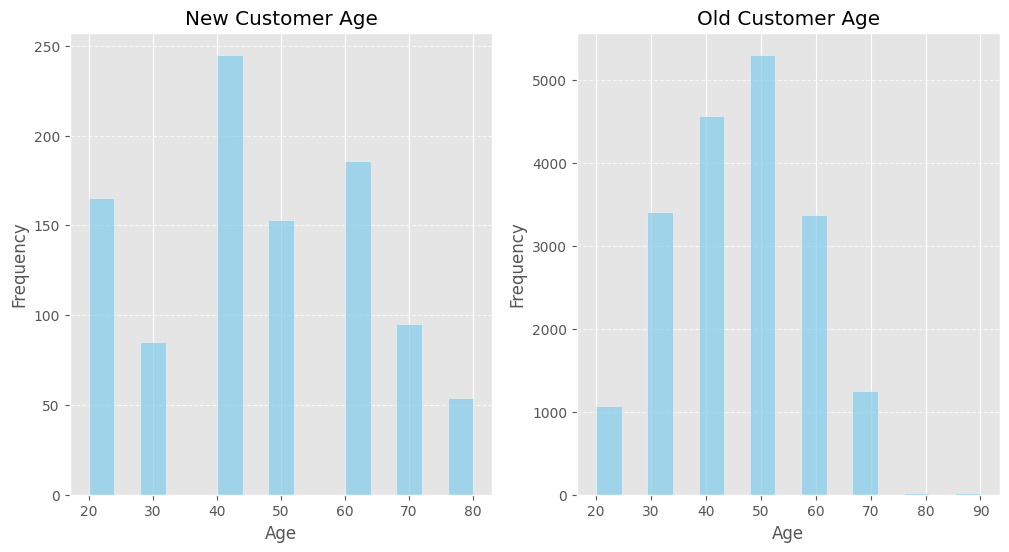

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(new_cust['Group_Age'], bins=15, kde=False, color='skyblue', ax=axes[0])
axes[0].set_title('New Customer Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)


sns.histplot(cust_trans_rfm['Age_Group'], bins=15, kde=False, color='skyblue', ax=axes[1])
axes[1].set_title('Old Customer Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

## Group Age of Past 3 Year related purchases

In [73]:
cust_bike_purchase_by_age = cust_trans_rfm.groupby('Age_Group').agg({'past_3_years_bike_related_purchases' : sum}).reset_index()

cust_bike_purchase_by_age['Percent_of_total'] = (cust_bike_purchase_by_age['past_3_years_bike_related_purchases']/cust_trans_rfm['past_3_years_bike_related_purchases'].sum())*100
cust_bike_purchase_by_age


,Age_Group,past_3_years_bike_related_purchases,Percent_of_total
0,20,54867,5.899715
1,30,172308,18.527861
2,40,227718,24.485964
3,50,253958,27.307488
4,60,158612,17.055164
5,70,60923,6.550902
6,80,658,0.070753
7,90,950,0.102151


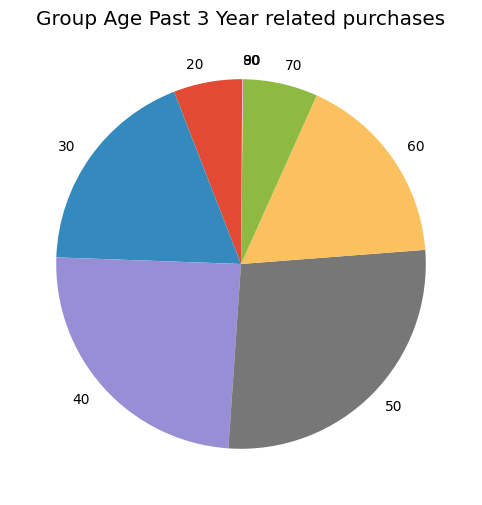

In [80]:
plt.figure(figsize=(8, 6))
plt.pie(cust_bike_purchase_by_age['Percent_of_total'], labels=cust_bike_purchase_by_age['Age_Group'], startangle=90)
plt.title('Group Age of Past 3 Year related purchases')
plt.show()

### Distribute Past 3 years bike related purchases on Gender

In [82]:
cust_bike_purchase_by_gender = cust_trans_rfm.groupby('gender').agg({'past_3_years_bike_related_purchases' : sum}).reset_index()

cust_bike_purchase_by_gender['Percent_of_total'] = (cust_bike_purchase_by_gender['past_3_years_bike_related_purchases']/cust_trans_rfm['past_3_years_bike_related_purchases'].sum())*100
cust_bike_purchase_by_gender


,gender,past_3_years_bike_related_purchases,Percent_of_total
0,Female,470544,50.596455
1,Male,459450,49.403545


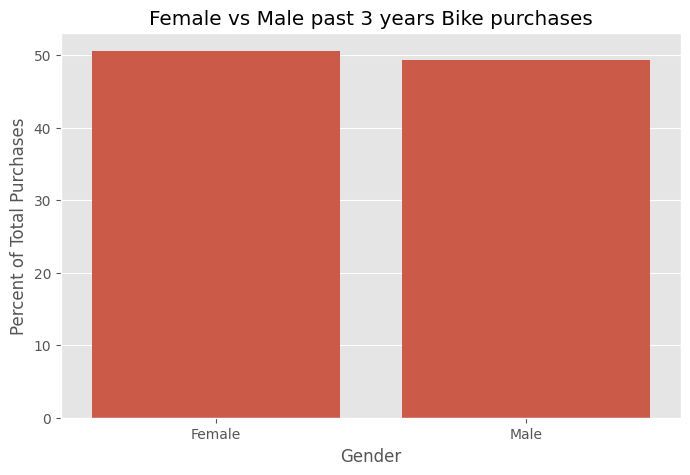

In [83]:
plt.figure(figsize=(8,5))
sns.barplot(x='gender',y='Percent_of_total',data=cust_bike_purchase_by_gender)
plt.xlabel('Gender')
plt.ylabel('Percent of Total Purchases')
plt.title('Female vs Male past 3 years Bike purchases')

plt.show()

### Wealth Segmentation by Age Group


In [89]:
wealth_age_seg_new = new_cust.groupby(['wealth_segment', 'Group_Age']).size().reset_index()
wealth_age_seg_new.rename(columns={0:'Number of Customers'}, inplace=True)

wealth_age_seg_old = cust_trans_rfm.groupby(['wealth_segment', 'Age_Group']).size().reset_index()
wealth_age_seg_old.rename(columns={0:'Number of Customers'}, inplace=True)

In [91]:
wealth_age_seg_old.head()

,wealth_segment,Age_Group,Number of Customers
0,Affluent Customer,20,273
1,Affluent Customer,30,865
2,Affluent Customer,40,1063
3,Affluent Customer,50,1258
4,Affluent Customer,60,862


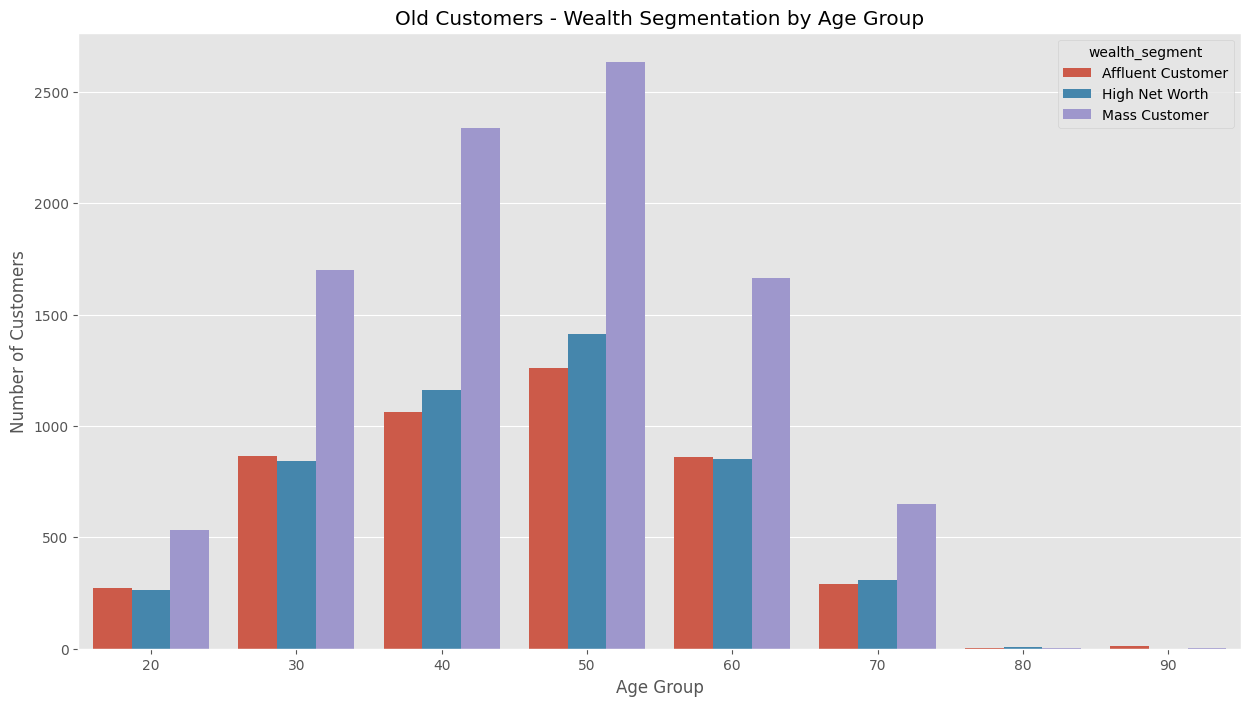

In [96]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age_Group', y='Number of Customers' , hue='wealth_segment', data=wealth_age_seg_old)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Wealth Segmentation by Age Group')
plt.show()

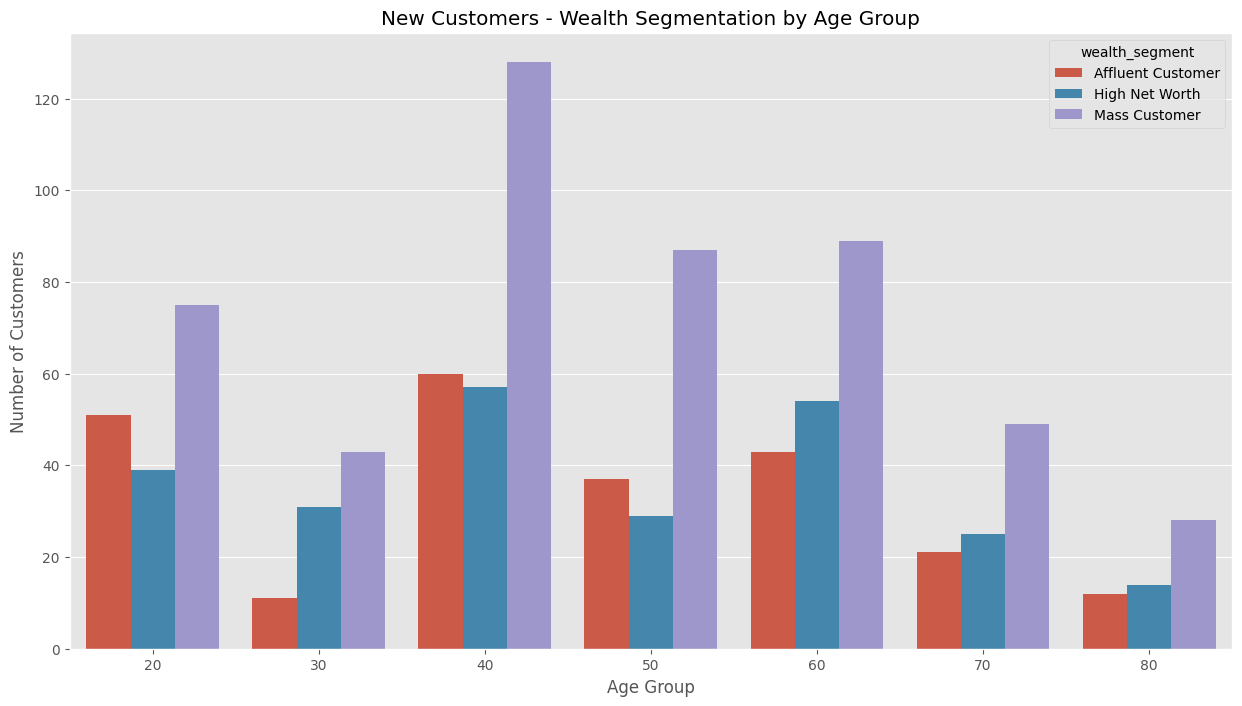

In [98]:
plt.figure(figsize=(15,8))
sns.barplot(x='Group_Age', y='Number of Customers' , hue='wealth_segment', data=wealth_age_seg_new)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Wealth Segmentation by Age Group')
plt.show()

## RFM Analysis Scatter Plots

<Figure size 800x700 with 0 Axes>

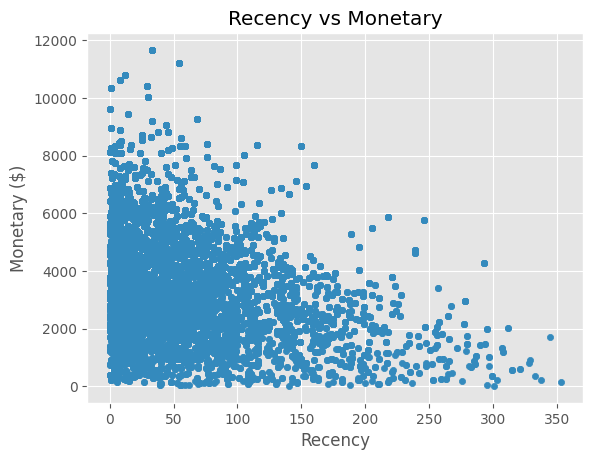

In [99]:
plt.figure(figsize=(8,7))
cust_trans_rfm.plot.scatter(x='recency' , y='monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary ($)')
plt.title('Recency vs Monetary')
plt.show()

<Figure size 800x700 with 0 Axes>

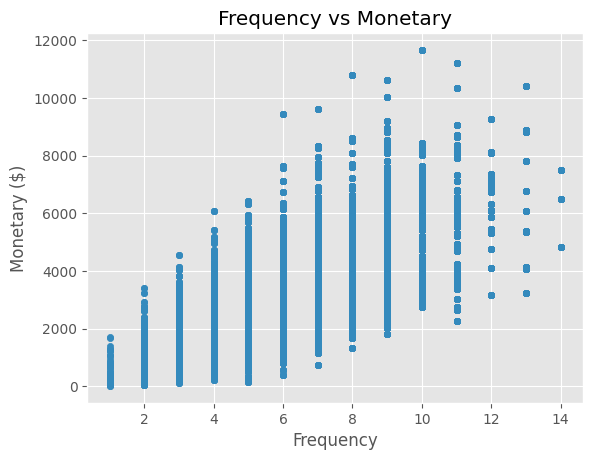

In [100]:
plt.figure(figsize=(8,7))
cust_trans_rfm.plot.scatter(x='frequency' , y='monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary ($)')
plt.title('Frequency vs Monetary')
plt.show()

## Customer Segment Distribution

In [106]:
cust_per_title = cust_trans_rfm[['detail_cust_title', 'customer_id','rank']].drop_duplicates().groupby(['detail_cust_title','rank']).size().reset_index().sort_values('rank')
cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
cust_per_title

,detail_cust_title,rank,Number of Customers
7,Platinum Customer,1,165
10,Very Loyal,2,250
1,Becoming Loyal,3,251
9,Recent Customer,4,365
8,Potential Customer,5,389
4,Late Bloomer,6,297
5,Loosing Customer,7,445
3,High Risk Customer,8,245
0,Almost Lost Customer,9,392
2,Evasive Customer,10,315


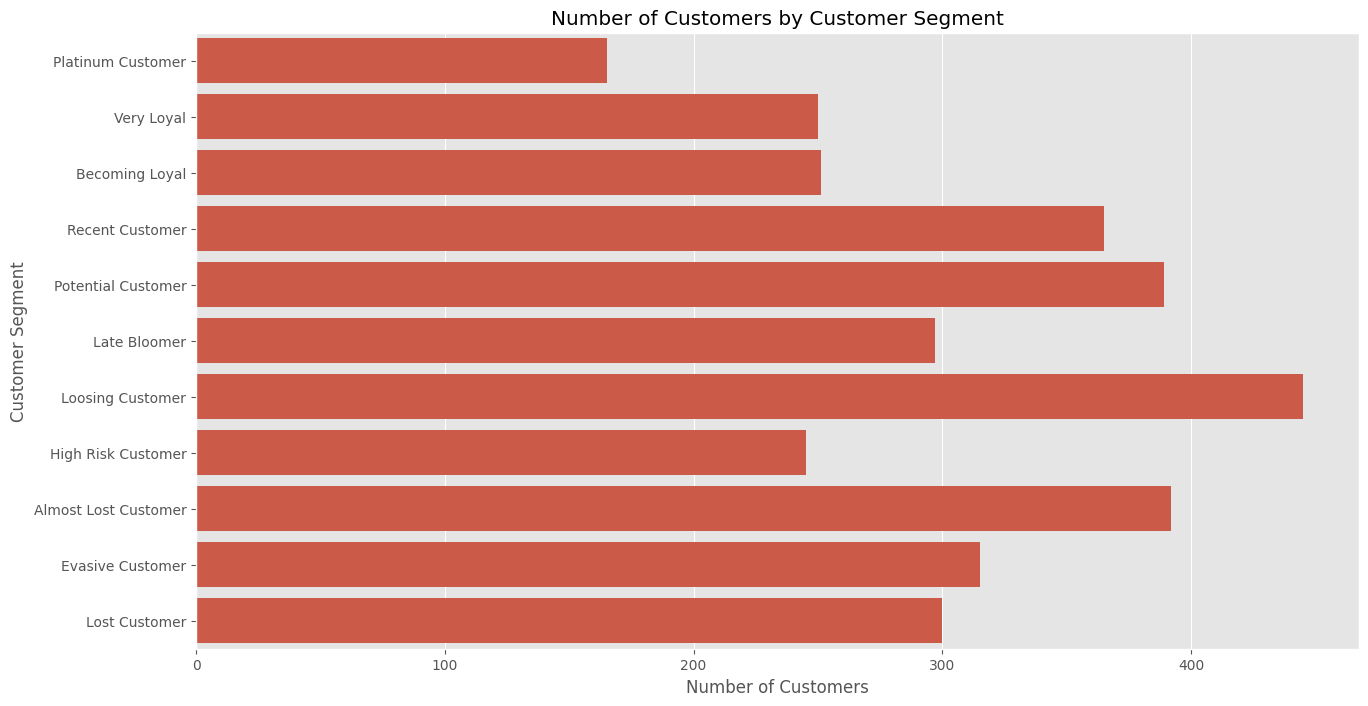

In [107]:
plt.figure(figsize=(15,8))
sns.barplot(y='detail_cust_title' , x='Number of Customers', data=cust_per_title)
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')
plt.show()